In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
# Load the dataset again
df = pd.read_csv('sensor poli AG D.csv')

df.head()
print(df.shape)

(215, 12)


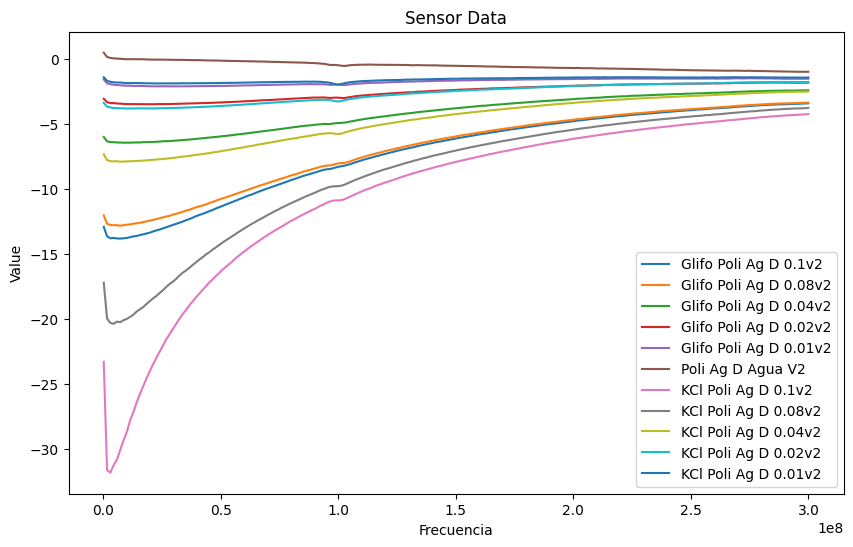

In [5]:
plt.figure(figsize=(10, 6))
for column in df.columns[1:]:
    plt.plot(df['Frecuencia'], df[column], label=column)
plt.xlabel('Frecuencia')
plt.ylabel('Value')
plt.legend()
plt.title('Sensor Data')
plt.show()

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

# Create a dictionary to store the models for each substance
models = {}
for substance in df.columns[1:]:
    # Get the df for the current substance
    df_substance = df[['Frecuencia', substance]].dropna()

    # Create a model for the current substance
    model = PolynomialRegression(2)
    model.fit(df_substance[['Frecuencia']], df_substance[substance])

    # Store the model
    models[substance] = model

# Calculate R-squared for each model
r_squared = {}
for substance, model in models.items():
    df_substance = df[['Frecuencia', substance]].dropna()
    score = model.score(df_substance[['Frecuencia']], df_substance[substance])
    r_squared[substance] = score



In [33]:
# create a df with  the b1 and b0 values for each substance cuadratic model

b_df = pd.DataFrame(columns=['substance', 'b0', 'b1', 'b2', 'r-squared'])

for substance, model in models.items():
    b2 = model.named_steps['linearregression'].coef_[2]
    b1 = model.named_steps['linearregression'].coef_[1]
    b0 = model.named_steps['linearregression'].intercept_

    b_df.loc[len(b_df)] = [substance, b0, b1, b2, r_squared[substance]]

print(b_df.shape)

trial_df = pd.concat([b_df] * 10, ignore_index=True)
trial_df

(11, 5)


,substance,b0,b1,b2,r-squared
0,Glifo Poli Ag D 0.1v2,-14.541247,7.460979e-08,-1.268907e-16,0.996762
1,Glifo Poli Ag D 0.08v2,-13.559334,6.619892e-08,-1.080164e-16,0.996625
2,Glifo Poli Ag D 0.04v2,-6.918062,2.504781e-08,-3.162102e-17,0.988698
3,Glifo Poli Ag D 0.02v2,-3.694470,1.019615e-08,-1.168011e-17,0.972143
4,Glifo Poli Ag D 0.01v2,-2.160404,3.824015e-09,-4.541430e-18,0.889025
...,...,...,...,...,...
105,KCl Poli Ag D 0.1v2,-26.581478,1.882576e-07,-4.016712e-16,0.951417
106,KCl Poli Ag D 0.08v2,-20.127628,1.237833e-07,-2.401164e-16,0.989135
107,KCl Poli Ag D 0.04v2,-8.466707,3.466887e-08,-4.797176e-17,0.992228
108,KCl Poli Ag D 0.02v2,-4.068809,1.261580e-08,-1.510092e-17,0.977741


In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

le = LabelEncoder()
trial_df['substance'] = le.fit_transform(trial_df['substance'])

print(trial_df.head(11))

# Split the data into features and labels
X = trial_df.drop('substance', axis=1)
y = trial_df['substance']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate the classifier
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

print(X_test)

    substance         b0            b1            b2  r-squared
0           4 -14.541247  7.460979e-08 -1.268907e-16   0.996762
1           3 -13.559334  6.619892e-08 -1.080164e-16   0.996625
2           2  -6.918062  2.504781e-08 -3.162102e-17   0.988698
3           1  -3.694470  1.019615e-08 -1.168011e-17   0.972143
4           0  -2.160404  3.824015e-09 -4.541430e-18   0.889025
5          10   0.102579 -4.843146e-09  4.379785e-18   0.982137
6           9 -26.581478  1.882576e-07 -4.016712e-16   0.951417
7           8 -20.127628  1.237833e-07 -2.401164e-16   0.989135
8           7  -8.466707  3.466887e-08 -4.797176e-17   0.992228
9           6  -4.068809  1.261580e-08 -1.510092e-17   0.977741
10          5  -1.921286  3.045497e-09 -3.759958e-18   0.844928
Accuracy: 1.0
            b0            b1            b2  r-squared
78  -13.559334  6.619892e-08 -1.080164e-16   0.996625
10   -1.921286  3.045497e-09 -3.759958e-18   0.844928
4    -2.160404  3.824015e-09 -4.541430e-18   0.889025
84

In [30]:
input_data = [[-1.92954, 2.96087e-09, -3.61703e-18, 0.844928]]
predicted_label = clf.predict(input_data)

# Convert the predicted label back to the original substance name
predicted_substance = le.inverse_transform(predicted_label)
print("Predicted substance:", predicted_substance[0])

Predicted substance: 5


c:\Users\Diego\Transfer\CIMAV\sensors\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Assuming you've loaded the data into a dataframe called df
df_transposed = df.T

le = LabelEncoder()
df_transposed['Label'] = le.fit_transform(df_transposed.index)

X = df_transposed.drop('Label', axis=1)
y = df_transposed['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)